# Bringing the new ORM-based classes to interactive use

In [72]:
# config
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator, MultipleLocator

from gasex import GasExManager
plt.style.use("jupno.mplstyle")
coverage = ["sml_coverage", "deep_coverage"]
pressure = ["sml_max_pressure", "deep_max_pressure"]
lift_off = ["sml_lift_off", "deep_lift_off"]
%matplotlib notebook

# basic plotting functions

def baseline_demo_dppc(spectrum, ref, name="default"):

    spectrum.correct_baseline()

    test = np.linspace(2750, 3050, 10000)
    func = spectrum.make_ch_baseline()
    borders = spectrum.slice_by_borders(3000, np.min(spectrum.wavenumbers))


    f, axarr = plt.subplots(3, sharex=True)

    axarr[0].plot(ref.wavenumbers, ref.normalized_intensity, label="reference", linewidth=1.5,
                  marker="o", markersize=3)

    ref_borders = ref.slice_by_borders(3000, np.min(spectrum.wavenumbers))
    axarr[0].fill_between(ref.wavenumbers[ref_borders[0]:ref_borders[1] + 1],
                          ref.normalized_intensity[ref_borders[0]:ref_borders[1] + 1])

    axarr[0].legend(frameon=False)

    axarr[1].plot(spectrum.wavenumbers, spectrum.normalized_intensity, label="spectrum", linewidth=1.5,
                  marker="o", markersize=3)
    axarr[1].plot(test, func(test), color="r", label="baseline")

    axarr[1].legend(frameon=False)

    axarr[2].plot(spectrum.wavenumbers, spectrum.baseline_corrected, label="spectrum", linewidth=1.5,
                  marker="o", markersize=3)
    axarr[2].fill_between(spectrum.wavenumbers[borders[0]:borders[1] + 1],
                          spectrum.baseline_corrected[borders[0]:borders[1] + 1])
    axarr[2].set_xlabel("wavenumber/ cm$^{-1}$")

    axarr[2].legend(frameon=False)
    f.text(0.025, 0.5, 'norm. intensity/ arb. u.', ha='center', va='center', rotation='vertical')
    for ax in axarr.flat:
        ax.set_xlim(2750, 3300)
    #plt.savefig(spectrum.name.full_name + ".png")
    plt.show()


def broken_axis_errorbar(lim, label="default"):
    fig, (ax, ax2) = plt.subplots(1, 2, sharey=True)

    ax.set_ylabel(label)
    fig.text(0.5, 0.03, s="day of the year", ha="center", va="center")

    ax.set_xlim(lim[0], lim[1])
    ax2.set_xlim(lim[2], lim[3])

    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax.yaxis.tick_left()
    ax.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.yaxis.tick_right()

    d = .012  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax2.plot((-d, +d), (-d, +d), **kwargs)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


    return ax, ax2


def plot_doy_by_attribute(manager, names):

    labels = {
        "tension": "Raw surface tension/ (mN $\cdot$ m$^{-1}$)",
        "pressure": "Max. surface pressure/ (mN $\cdot$ m$^{-1}$)",
        "coverage": "% surface coverage",
        "lift_off": "lift-off compression ration"
    }
    for item in labels:
        if item in names[0]:
            axes = broken_axis_errorbar([153, 167, 254, 266], label=labels[item])

    if not axes:
        axes = broken_axis_errorbar([153, 167, 254, 266], label=labels[item])

    axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

    i = 1
    for name in names:
        axes[0].scatter(manager.station_table["date"].dt.dayofyear, manager.station_table[name])

        axes[1].scatter(manager.station_table["date"].dt.dayofyear, manager.station_table[name], label=name)
        i += 1
    
    #if "tension" in names[0]:
        #axes[0].axhline(73.11, linestyle="--", color="navy", alpha=0.7)
        #axes[1].axhline(73.11, linestyle="--", color="navy", alpha=0.7, label="$\sigma_{(pure,\ 21°C, 17\ PSU)}$")


    axes[1].legend().draggable()
    
    
    plt.show()

    
def newposter(spectrum, ref, doy1, doy2, coverage1, coverage2, c1d, c1s, c2d, c2s, lim=[153, 167, 254, 266]):

    fig = plt.figure()
    gs = fig.add_gridspec(4, 2)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, :], sharex=ax1)
    ax3 = fig.add_subplot(gs[2:, 0])
    ax4 = fig.add_subplot(gs[2:, 1])
    ax1.set_xlim(2750, 3100)

    norm_factor = np.max(ref.normalized_intensity)


    #sfg data
    spectrum.correct_baseline()
    test = np.linspace(2750, 3050, 10000)
    func = spectrum.make_ch_baseline()
    borders = spectrum.slice_by_borders(np.min(spectrum.wavenumbers), 3000)



    ax1.plot(ref.wavenumbers, ref.normalized_intensity, label="DPPC reference, coverage 100 %", linewidth=1.5,
                  marker="o", markersize=3)

    ref_borders = ref.slice_by_borders(np.min(spectrum.wavenumbers), 3000)
    ax1.fill_between(ref.wavenumbers[ref_borders[0]:ref_borders[1] + 1],
                          ref.normalized_intensity[ref_borders[0]:ref_borders[1] + 1]/norm_factor)

    ax1.legend(frameon=False)

    ax1.xaxis.set_tick_params(labeltop='on', pad=2.)

    ax1.xaxis.set_label_position('top')
    ax1.set_xlabel("wavenumber/ cm$^{-1}$")
    ax1.xaxis.tick_top()
    ax1.text(2800, 0.8, "CH vibrations")

    ax2.plot(spectrum.wavenumbers, spectrum.normalized_intensity/norm_factor, label="GasEx sample", linewidth=1.5,
             marker="o", markersize=3)

    y1 = spectrum.normalized_intensity[borders[0]:borders[1] + 1]
    y2 = func(spectrum.wavenumbers[borders[0]:borders[1] + 1])
    ax2.fill_between(spectrum.wavenumbers[borders[0]:borders[1] + 1], y1/norm_factor, y2/norm_factor, where=y1 > y2, interpolate=True)
    ax2.fill_between(spectrum.wavenumbers[borders[0]:borders[1] + 1], y1/norm_factor, y2/norm_factor, where=y1 < y2,
                     interpolate=True, color="green", alpha=0.7)

    
def check_plate_screen(gmanager, prop):
    
    ax1, ax2 = broken_axis_errorbar([153, 167, 254, 266], label=prop)
    
    for stat in gmanager.stations:

        for samp in stat.samples:

            if samp.data.type == "p":
                ax1.scatter(stat.doy, getattr(samp, prop), color="red", marker="^")
                ax2.scatter(stat.doy, getattr(samp, prop), color="red", marker="^")

            elif samp.data.type == "s":
                ax1.scatter(stat.doy, getattr(samp, prop), color="blue", marker="D", alpha=.7)
                ax2.scatter(stat.doy, getattr(samp, prop), color="blue", marker="D", alpha=.7)


    # customize legend
    lines = [Line2D([0], [0], color='w', lw=.6, label='Line', marker='^',mfc="red", alpha=.8), \
             Line2D([0], [0], color='w', lw=.6, label='Line', marker='D', mfc="blue", alpha=.8)]
    labels = ["plate", "screen"]

    l = plt.legend(lines,labels)
    plt.show()

In [3]:
S = GasExManager(new=False)

<IPython.core.display.Javascript object>


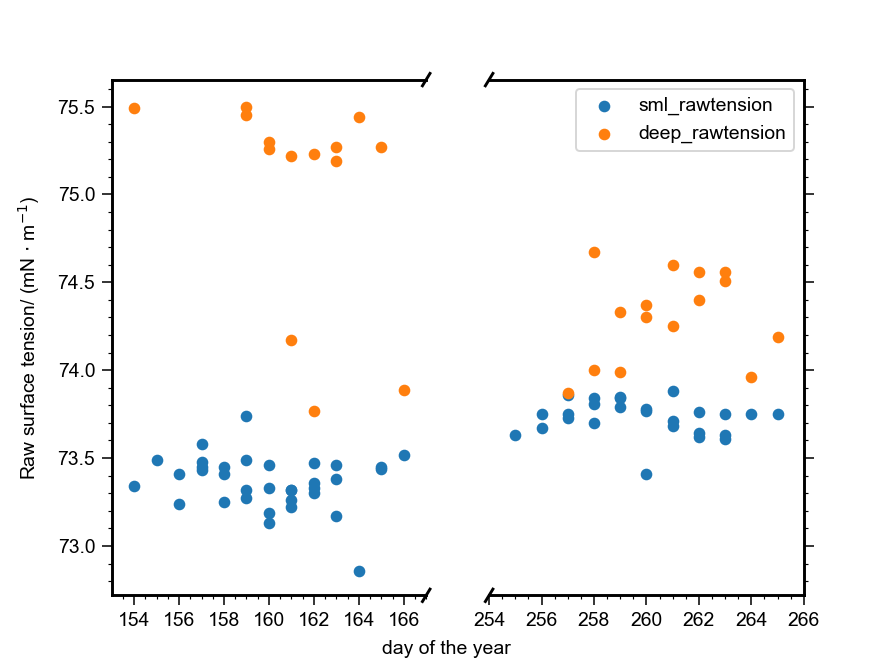

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
D:\Anaconda\lib\site-packages\matplotlib\legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


In [73]:
# testcode section

%matplotlib notebook
coverage = ["sml_coverage", "deep_coverage"]
pressure = ["sml_max_pressure", "deep_max_pressure"]
lift_off = ["sml_lift_off", "deep_lift_off"]
rawtens = ["sml_rawtension", "deep_rawtension"]
tension = ["sml_tension", "deep_tension"]

#plot_doy_by_attribute(S, tension)
#plot_doy_by_attribute(S, pressure)
plot_doy_by_attribute(S, rawtens)


In [ ]:
S.station_table.describe()

In [ ]:
    def plot_av_coverage(df):
        """A convenience function plotting the results of the coverage analysis as a function of date."""
        fig, ax = plt.subplots()
        months = MonthLocator(range(1, 13), bymonthday=1, interval=3)
        monthsFmt = DateFormatter("%b '%y")

        for item in self.sfg:
            if item.year == 2019:
                print(item)

            ax.scatter(item, self.sfg[item][0]*100, color="red")

        for item in self.sfg_deep:
            ax.scatter(item, self.sfg_deep[item][0] * 100, color="blue")
            if item.year == 2019:
                print(item)

        for i in range(8, 20, 1):
            lower = date(2000+i, 3, 1)
            upper = date(2000 + i, 9, 1)
            ax.axvspan(lower, upper, color="g", alpha=0.4)

        ax.xaxis.set_major_locator(months)
        ax.xaxis.set_major_formatter(monthsFmt)
        ax.autoscale_view()
        fig.autofmt_xdate()
        legend_elements = [Line2D([0], [0], marker='o', label='Bulk water',
                          markerfacecolor='blue', mew=0.3,  mec="black", aa=True, linestyle=''),
                           Line2D([0], [0], marker='o', label='Surface microlayer',
                                   markerfacecolor='red', mew=0.3, mec="black", aa=True, linestyle='')
                            ]
        ax.legend(handles=legend_elements)
        #ax.grid(True)
        ax.set_xlabel("time ")
        ax.set_ylabel("Surface coverage/ %")
        rcParams['axes.labelsize'] = 10

        plt.show()
        #plt.savefig("boknis.png")

In [ ]:
from boknis_eck import BoknisEckExtension

from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.lines import Line2D


b = BoknisEckExtension()

df = b.provide_dataframe()

df["sml_coverage"] = df["sml_coverage"].mask(df["sml_coverage"] > 1)
df["bulk_coverage"] = df["bulk_coverage"].mask(df["bulk_coverage"] > 1)

plt.plot(df["sampling_date"], df["bulk_coverage"], "+")
plt.plot(df["sampling_date"], df["sml_coverage"], "*")
plt.ylim(-0.01, 1.1)

In [8]:
# for coverage
%matplotlib qt
plt.style.use("qt.mplstyle")
#rcParams['figure.figsize'] = 16.0, 8.0
#rcParams['axes.labelsize'] = 18
#rcParams['font.size'] = 18
#rcParams['figure.subplot.bottom'] = 0.12


fig, ax = plt.subplots()
ax2 = ax.twinx()

months = MonthLocator(range(1, 13), bymonthday=1, interval=6)
monthsFmt = DateFormatter("%b '%y")

ax.scatter(df["sampling_date"], df["sml_coverage"]*100, color="red")
ax.scatter(df["sampling_date"], df["bulk_coverage"]*100, color="blue", marker="^")
ax2.scatter(df["sampling_date"], df["chlorophyll"], color="green", marker="+")

       
for i in range(8, 20, 1):
        lower = date(2000+i, 3, 1)
        upper = date(2000 + i, 9, 1)
        ax.axvspan(lower, upper, color="gray", alpha=0.4)

legend_elements = [Line2D([0], [0], marker='^', label='Bulk water',
                          markerfacecolor='blue', mew=0.3,  mec="black", aa=True, linestyle=''),
                           Line2D([0], [0], marker='o', label='Surface microlayer',
                                   markerfacecolor='red', mew=0.3, mec="black", aa=True, linestyle=''),
                           Line2D([0], [0], marker='+', label='Chlorophyll a',
                                   markerfacecolor='green', mew=2, mec="green", aa=True, linestyle='', markersize=10)
                            ]

ax.legend(handles=legend_elements)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
fig.autofmt_xdate()

ax.set_xlabel("time ")
ax.set_ylabel("Surface coverage/ %")
ax2.set_ylabel("Chlorophyll a concentration/\n some unit")
rcParams['xtick.labelsize'] = 'small'

plt.show()

OSError: 'qt.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [6]:
plt.style.use("jupno.mplstyle")
%matplotlib qt
rcParams['figure.figsize'] = 16.0, 8.0
rcParams['axes.labelsize'] = 18
rcParams['font.size'] = 18
rcParams['figure.subplot.bottom'] = 0.12


fig, ax = plt.subplots()
#ax2 = ax.twinx()

months = MonthLocator(range(1, 13), bymonthday=1, interval=6)
monthsFmt = DateFormatter("%b '%y")

data = df["sml_dangling"]/df["sml_ch"]
#data = data.mask(data > 20)
ax.scatter(df["sampling_date"],  data, color="red")

data = df["sml_oh1"]/df["sml_oh2"]
ax.scatter(df["sampling_date"],  data, color="violet")

data = df["bulk_oh1"]/df["bulk_oh2"]
ax.scatter(df["sampling_date"],  data, color="brown")

data = df["bulk_dangling"]/df["bulk_ch"]
#data = data.mask(data > 20)
ax.scatter(df["sampling_date"],  data, color="blue")

       
for i in range(8, 20, 1):
        lower = date(2000+i, 3, 1)
        upper = date(2000 + i, 9, 1)
        ax.axvspan(lower, upper, color="gray", alpha=0.4)

legend_elements = [Line2D([0], [0], marker='^', label='Bulk water',
                          markerfacecolor='blue', mew=0.3,  mec="black", aa=True, linestyle=''),
                           Line2D([0], [0], marker='o', label='Surface microlayer',
                                   markerfacecolor='red', mew=0.3, mec="black", aa=True, linestyle=''),
                           Line2D([0], [0], marker='+', label='Chlorophyll a',
                                   markerfacecolor='green', mew=2, mec="green", aa=True, linestyle='', markersize=10)
                            ]

#ax.legend(handles=legend_elements)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
fig.autofmt_xdate()

ax.set_xlabel("time ")
ax.set_ylabel("Surface coverage/ %")
ax2.set_ylabel("Chlorophyll a concentration/\n some unit")
rcParams['xtick.labelsize'] = 'small'

plt.show()

In [55]:
a = df["sml_dangling"]/df["sml_ch"]
a

0     0.274424
1     0.412102
2     0.224305
3     0.756431
4     0.124153
        ...   
76    0.995784
77    0.577169
78    0.449612
79    1.171168
80    1.259038
Length: 81, dtype: float64